In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image # for image processing and loading
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset 
# DataLoader is for loading data in batches
# TensorDataset is for custom dataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms

# from google.colab import drive -> 구글 드라이브 연동 시 사용 (라이브러리)


In [2]:
#drive.mount('/content/drive') 구글 드라이브 연결 

In [3]:
torch.manual_seed(777)
IMAGE_SIZE = 128 # 훈련 시키려면 이미지 크기를 통일 시켜야함. 128x128로 통일

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cude.manual_seed_all(777)
    

In [4]:
original_datasets=ImageFolder(root='flower_photos/', 
                                transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()])) # 이미지 폴더에서 이미지를 불러옴

In [5]:
print(original_datasets) #Number of datapoints: 2313 -> 2313개의 이미지가 있음
# anti aliasing은 이미지를 축소할 때 이미지의 품질을 유지하기 위해 사용하는 기술

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [6]:
original_loader=DataLoader(original_datasets, 
                           batch_size=2313, # 2313 -> 전체 데이터를 한번에 불러옴
                           shuffle=True, # shuffle=False -> 데이터를 섞지 않음. 순서대로 불러옴
                            drop_last=False, # drop_last=False -> 데이터가 남아도 마지막 배치를 버리지 않음
                            num_workers=1) # num_workers=1 -> 데이터를 불러올 때 사용할 프로세스 수, 단일 프로세스 사용
# 이미지를 불러온 데이터셋을 DataLoader로 불러옴



In [7]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break


torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([3, 0, 4,  ..., 4, 3, 2])


In [8]:
# 이미지 로더로 불러온 이미지와 라벨을 추출 -> next(iter(데이터로더))
#total_batch=len(original_loader)
#print(total_batch)

#for i in range(total_batch):
original_images, labels = next(iter(original_loader)) # next(iter(데이터로더)) -> 데이터로더에서 데이터를 하나씩 batch_size만큼 불러옴
print(original_images.shape)
print(labels.shape)

torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [9]:
print(labels[:10])

tensor([1, 3, 3, 0, 1, 3, 2, 2, 4, 3])


In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



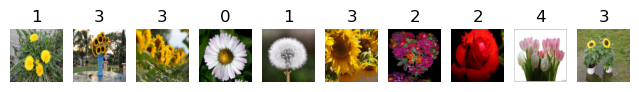

In [11]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0)) # permute -> 차원을 바꿔줌 -> 이미지는 (가로,세로,채널)로 되어있는데, (채널,가로,세로)로 바꿔줘야함
    plt.axis('off') # 축을 없앰
plt.show()

In [20]:
X1=original_images # 128 x 128 x 3 이미지 (가로,세로,채널)
Y1=labels 
print(X.size(), Y.size())

torch.Size([2313, 3, 128, 128]) torch.Size([2313])


In [12]:
# 이미지 증강

Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE,IMAGE_SIZE)), # 이미지 중앙을 기준으로 이미지 크롭-> 이미지 크기를 128x128로 통일
    transforms.ToTensor()
])

In [13]:
transforms_dataset=ImageFolder(root='flower_photos/', 
                                transform=Image_transform) # 이미지 폴더에서 이미지를 불러옴
transforms_loader=DataLoader(transforms_dataset, 
                             batch_size=100, 
                             shuffle=True,
                             num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [14]:
transforms_images, transforms_labels=next(iter(transforms_loader)) # image 100개를 불러옴

In [22]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0) # 이미지를 합침
Y2=torch.cat([Y1, transforms_labels], dim=0) # 라벨을 합침
print(X2.size(), Y2.size())

torch.Size([100, 3, 128, 128]) torch.Size([100])
torch.Size([2513, 3, 128, 128]) torch.Size([2413])


In [15]:
# image를 128x128로 크롭한 이미지를 출력


none_datasets=ImageFolder(root='flower_photos/',
                            transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()
                            ])) # 이미지 폴더에서 이미지를 불러옴

none_loader=DataLoader(none_datasets, batch_size=100, shuffle=False,
                          num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [18]:
none_images, none_labels=next(iter(none_loader))

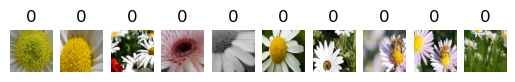

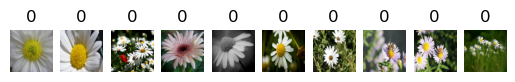

In [19]:
# 이미지 크기를 128x128로 통일한 이미지와 원본 이미지를 비교

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()



for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()

In [23]:
def create_loader(transform): 
    transforms_dataset=ImageFolder(root='flower_photos/',
                                transform=transform) # 이미지 폴더에서 이미지를 불러옴
    transforms_loader=DataLoader(transforms_dataset,
                                batch_size=1000,
                                shuffle=True,
                                num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴
    
    transforms_images, labels=next(iter(transforms_loader)) # image 100개를 불러옴
    return transforms_images, labels

In [29]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                            contrast=(1,1), 
                            saturation=(0.7,0.9), 
                            #hue=(-0.2, 0.2) # 이미지의 밝기, 대비, 채도, 색조를 변경
                ),

    transforms.ToTensor()
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

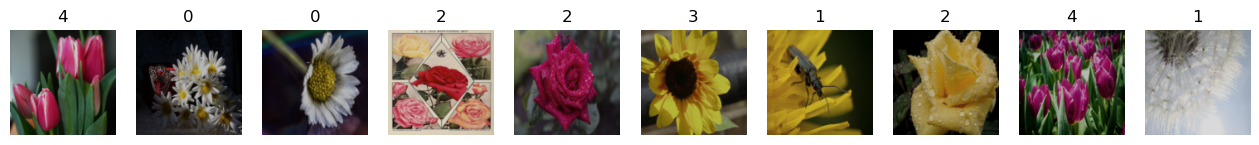

In [30]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()

In [31]:
X3=torch.cat([X2, color_tf_images], dim=0) # 이미지를 합침
Y3=torch.cat([Y2, color_tf_labels], dim=0) # 라벨을 합침
print(X3.size(), Y3.size())

torch.Size([3513, 3, 128, 128]) torch.Size([3413])


In [32]:
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.8), # 이미지를 수평으로 뒤집음
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels=create_loader(Image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0) # 이미지를 합침
Y4=torch.cat([Y3, flip_tf_labels], dim=0) # 라벨을 합침
print(X4.size(), Y4.size())

torch.Size([4513, 3, 128, 128]) torch.Size([4413])


In [33]:
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.RandomRotation(degrees=(-15, 15), # 이미지를 -15도에서 15도 사이로 회전
                              interpolation=transforms.InterpolationMode.BILINEAR, fill=0), # 이미지를 회전할 때 보간법 사용
        transforms.ToTensor()
])
rot_tf_images, rot_tf_labels=create_loader(Image_transform)
X5=torch.cat([X4, flip_tf_images], dim=0) # 이미지를 합침
Y5=torch.cat([Y4, flip_tf_labels], dim=0) # 라벨을 합침
print(X5.size(), Y5.size())

torch.Size([5513, 3, 128, 128]) torch.Size([5413])
